In [43]:
pip install statsmodels --upgrade

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg


In [53]:
df = pd.read_csv('tempdata.csv',index_col = 0,parse_dates = True)
X=df.values
print('shape of data:',df.shape)
print('original dataset:',df.head())
print('After exctraction only temperature:',X)

shape of data: (12607, 1)
original dataset:               temp
date              
1990-01-01  23.730
1990-01-02  23.505
1990-01-03  22.960
1990-01-04  22.190
1990-01-05  19.820
After exctraction only temperature: [[23.73 ]
 [23.505]
 [22.96 ]
 ...
 [23.725]
 [23.745]
 [22.45 ]]


df.plot()

In [58]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['temp'], autolag='AIC')

print('\n 1.ADF:\n',dftest[0])
print('\n 2.P-value:\n',dftest[1])
print('\n 3.Num of lags\n',dftest[2])
print("\n 4.Number of observation used for ADF Regression and Critical Values Calculation:\n",dftest[3])
print("\n 5.Critical Values:")
for key,val in dftest[4].items():
    print("\t",key, ":", val)


 1.ADF:
 -10.444399370631475

 2.P-value:
 1.4931118532660429e-18

 3.Num of lags
 41

 4.Number of observation used for ADF Regression and Critical Values Calculation:
 12565

 5.Critical Values:
	 1% : -3.430870544085656
	 5% : -2.8617700546933054
	 10% : -2.566892453128333


<Axes: xlabel='date'>

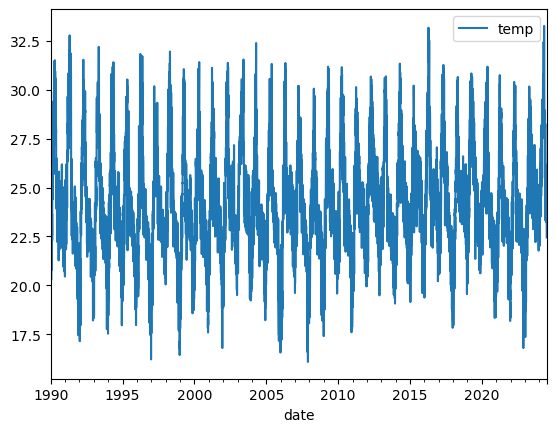

In [59]:
df.plot()

<Axes: xlabel='date'>

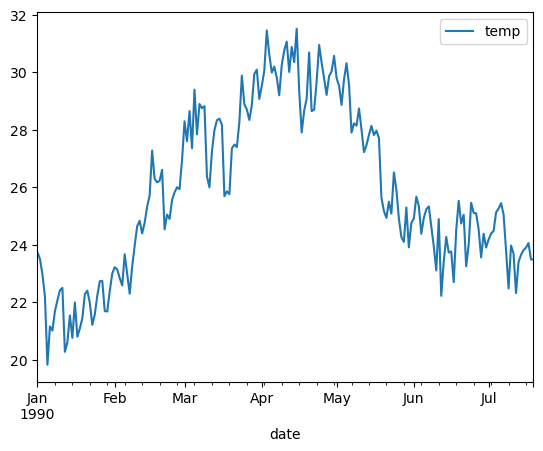

In [60]:
df[:200].plot()

In [61]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

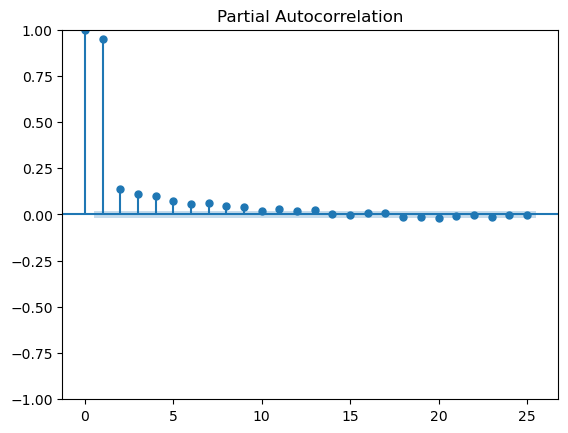

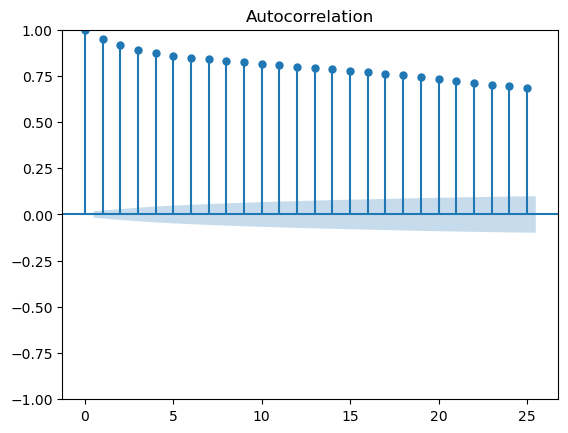

In [62]:
pacf = plot_pacf(df['temp'], lags=25)
acf = plot_acf(df['temp'], lags=25)

In [63]:
train = X[:len(X)-7]
test = X[len(X)-7:]

In [64]:
model = AutoReg(train,lags=10).fit()

In [65]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                12600
Model:                    AutoReg(10)   Log Likelihood              -15549.413
Method:               Conditional MLE   S.D. of innovations              0.832
Date:                Thu, 11 Jul 2024   AIC                          31122.826
Time:                        00:32:04   BIC                          31212.114
Sample:                            10   HQIC                         31152.707
                                12600                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6179      0.070      8.811      0.000       0.480       0.755
y.L1           0.7691      0.009     86.313      0.000       0.752       0.787
y.L2           0.0344      0.011      3.056      0.0

In [66]:
print(len(train))

12600


In [67]:
pred = model.predict(start = len(train) ,end = len(X)-1,dynamic = False)

[25.20480508 25.00036676 24.88964327 24.83268715 24.78691757 24.77384492
 24.7688259 ]


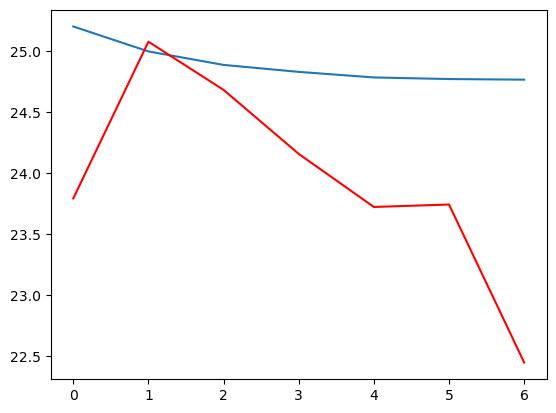

In [68]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test,color = 'red')
print(pred)

In [72]:
pip install scikit-learn

In [75]:
from math import sqrt

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
rmse = sqrt(mean_squared_error(test,pred))

In [79]:
print(rmse)

1.1982977833968236


In [81]:
pred_future = model.predict(start=len(X)+1, end = len(X)+7,dynamic = False)
print("the future prediction for the next week ")
print(pred_future)
print("number of predictions Made:\t",len(pred_future))

the future prediction for thw next week 
[24.83531609 24.84325257 24.83599525 24.82342057 24.8110116  24.79948047
 24.78942374]
number of predictions Made:	 7
